# Linear Regression Model

Linear Regression Model 就是为了找到数据的 Feature 和对应 Label 之间的线性关系，这里的线性关系可以是 Generalize 上的线性关系，Generalize 就是说模型的输入可以是直接是数据的 Feature，也可以是 Feature 经过函数变换后的结果。“ Regression ”的意思是说建立的模型输出不是一个类别变量，而是一个连续的、与原始的 Label 尽可能接近的实数。

最简单的 Linear Regression Model 是 Linear Regression with One Variable，也即 Feature 的数量是 1。可以通过 Numpy 很容易构造出这样的只有一个 Feature 和一个 Label 的数据集。

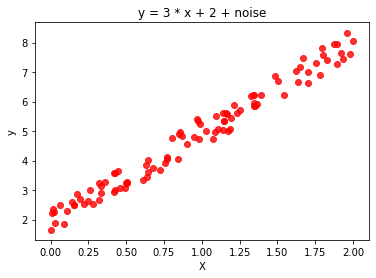

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * 3 + 2

noise = np.random.uniform(-0.5, 0.5, 100)
X = np.random.uniform(0, 2, 100)
y = f(X) + noise

plt.scatter(X, y, alpha=0.8, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3 * x + 2 + noise')
plt.show()
plt.close()

执行上面的代码，可以生成这部分内容所需要的数据集。函数 $f(x)$ 定一个了线性关系，即 $Label = 3 \times Feature + 2 + noise$，noise 表示的是一个从 [-0.5, 0.5) 正态分布中产生的随机数。添加 noise 的想法很直接，因为在实际的生活中，采集数据是会有误差的。

在这样的数据集上应用的 Linear Regression Model 方法，设定用于拟合数据集的函数为 $\hat{y}=\theta \cdot x + b$，在这个函数中，如果求解出 $\theta$ 和 $b$，任务就完成了。如何求解呢，可以这样想，一开始随机设置一个 $\theta$ 和 $b$，然后对比 $y$ 和 $\hat{y}$ 的差别，然后修改 $\theta$ 和 $b$ 使得新的 $y$ 和 $\hat{y}$ 的差距越来越小。上面这句话描述了 Machine Learning 中很重要的两个概念 Loss 和 Learning Method。在当前的情况下，Loss 可以选择 Mean Squared Error，用数学公式表示即为 $Loss(y, \hat{y}) = \frac{1}{2} (\hat{y} - y)^2=\frac{1}{2} (\theta \cdot x + b - y)^2$。

## Stochastic Graident Descent

Learning Method 的目的是使得 Loss 的值越来越小，即要找到 Loss 的一个极小（极大）值。由于上面的 Loss 函数是关于 $\theta$ 和 $b$ 的二次函数，其他的 $y$ 和 $x$ 都是已知值，也即训练数据。所以 Loss 函数可以表示为 $Loss(\theta, b)$，要使得 Loss 变小，可以让 $\theta_{new} = \theta_{old} - \frac{\partial Loss}{\partial \theta}$，同理 $b$ 的变化方式也一样，知道 Loss 为 0 或者小于一个指定的值，就可以认为找到了理想的 $\theta$ 和 $b$。

$\begin{align*}
\theta & = \theta - \eta \cdot (\hat{y} - y) \cdot x\\
b & = b - \eta \cdot (\hat{y} - y)
\end{align*}$

这种一次只取一个数据，然后更新 $\theta$ 和 $b$ 的做法叫做 Stochastic Graident Descent。好处就是实现起来比较简单，缺点呢就是收敛比较慢。

In [2]:
theta = 0.01
b = 0.01
LEARNING_RATE = 0.01

EPOCH = 1000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=1)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = y_pred - sample_y
    theta = theta - LEARNING_RATE * loss * sample_x
    b = b - LEARNING_RATE * loss

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, (loss * loss).sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 20.759701
EPOCH: 50, loss: 0.533411
EPOCH: 100, loss: 0.040748
EPOCH: 150, loss: 0.037810
EPOCH: 200, loss: 0.077133
EPOCH: 250, loss: 0.000708
EPOCH: 300, loss: 0.105310
EPOCH: 350, loss: 0.000100
EPOCH: 400, loss: 0.124349
EPOCH: 450, loss: 0.000093
EPOCH: 500, loss: 0.047370
EPOCH: 550, loss: 0.161702
EPOCH: 600, loss: 0.210217
EPOCH: 650, loss: 0.008966
EPOCH: 700, loss: 0.091446
EPOCH: 750, loss: 0.001876
EPOCH: 800, loss: 0.106708
EPOCH: 850, loss: 0.060141
EPOCH: 900, loss: 0.048776
EPOCH: 950, loss: 0.005198
theta is 2.925756, b is 2.047663


# Batch Gradient Descent

Batch Gradient Descent 和 Stochastic Gradient Descent 的差别在于一次读取一批数据，然后使用这批数据的均值 Gradient，作为下降的参数，这个时候的 Stochastic Gradient Descent 就需要稍作修改，也即

$\begin{align*}
\theta & = \theta - \eta \cdot \frac{1}{N} \sum_i(\hat{y_i} - y_i) \cdot x_i \\
b & = b - \eta \cdot \frac{1}{N} \sum_i(\hat{y_i} - y_i)
\end{align*}$

一个批次的数据是 N，均值 Gradient 的计算即为 $\frac{1}{N} \sum_i(y_i - \hat{y_i}) \cdot x_i$

In [3]:
theta = 0.1
b = 0.1
LEARNING_RATE = 0.01

BATCH_SIZE = 32
EPOCH = 1000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = y_pred - sample_y
    theta = theta - LEARNING_RATE * np.dot(loss, sample_x) / BATCH_SIZE
    b = b - LEARNING_RATE * np.sum(loss, 0) / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, (loss * loss).sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 762.232602
EPOCH: 50, loss: 63.996530
EPOCH: 100, loss: 15.512963
EPOCH: 150, loss: 7.786695
EPOCH: 200, loss: 2.193072
EPOCH: 250, loss: 3.605507
EPOCH: 300, loss: 3.649783
EPOCH: 350, loss: 3.160050
EPOCH: 400, loss: 3.369967
EPOCH: 450, loss: 1.898095
EPOCH: 500, loss: 2.738226
EPOCH: 550, loss: 2.392731
EPOCH: 600, loss: 2.593665
EPOCH: 650, loss: 2.511357
EPOCH: 700, loss: 3.121677
EPOCH: 750, loss: 2.489529
EPOCH: 800, loss: 2.600351
EPOCH: 850, loss: 2.385792
EPOCH: 900, loss: 2.619259
EPOCH: 950, loss: 3.004549
theta is 2.947029, b is 2.033713


## 使用 Tensorflow 或者 PyTorch 实现

### PyTorch

类似于 numpy 的 torch，没有使用 AutoGrad

In [4]:
import numpy as np
import torch

device = torch.device('cpu')
dtype = torch.double

INPUT_DIMENSION, OUTPUT_DIMENSION = 1, 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype)
b = torch.randn(1, 1, device=device, dtype=dtype)
LEARNING_RATE = 0.01

BATCH_SIZE = 32
EPOCH = 1000
PRINT_STEP = EPOCH / 20

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = theta.T * sample_x + b
    loss = y_pred - sample_y

    theta -= LEARNING_RATE * (loss.mul(sample_x).sum()) / BATCH_SIZE
    b -= LEARNING_RATE * loss.sum() / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, (loss * loss).sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 443.779884
EPOCH: 50, loss: 80.516441
EPOCH: 100, loss: 52.971726
EPOCH: 150, loss: 26.093093
EPOCH: 200, loss: 23.916341
EPOCH: 250, loss: 24.182951
EPOCH: 300, loss: 18.259069
EPOCH: 350, loss: 26.838456
EPOCH: 400, loss: 14.953575
EPOCH: 450, loss: 15.279127
EPOCH: 500, loss: 14.339197
EPOCH: 550, loss: 6.374667
EPOCH: 600, loss: 9.999017
EPOCH: 650, loss: 9.814846
EPOCH: 700, loss: 9.317012
EPOCH: 750, loss: 7.565979
EPOCH: 800, loss: 6.270462
EPOCH: 850, loss: 4.186625
EPOCH: 900, loss: 5.419664
EPOCH: 950, loss: 4.301920
theta is 2.612036, b is 2.395788


如果使用 AutoGrad，上面的代码就会少掉一部分。在 torch 中，每一个 epoch 要把每一个变量的 grad 设为 0，不设为 0 的话，grad 会累计。

In [5]:
import numpy as np
import torch

device = torch.device('cpu')
dtype = torch.double

INPUT_DIMENSION, OUTPUT_DIMENSION = 1, 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype, requires_grad=True)
b = torch.randn(1, 1, device=device, dtype=dtype, requires_grad=True)
LEARNING_RATE = 0.001

BATCH_SIZE = 16
EPOCH = 100
PRINT_STEP = EPOCH / 20

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = theta.T * sample_x + b
    loss = y_pred - sample_y

    loss.pow(2).sum().backward()

    with torch.no_grad():
        theta -= LEARNING_RATE * theta.grad
        b -= LEARNING_RATE * b.grad

        # Manually zero the gradients after updating weights
        theta.grad.zero_()
        b.grad.zero_()

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, loss.pow(2).sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 889.551267
EPOCH: 5, loss: 415.607416
EPOCH: 10, loss: 199.158947
EPOCH: 15, loss: 52.008569
EPOCH: 20, loss: 45.877460
EPOCH: 25, loss: 36.053915
EPOCH: 30, loss: 17.929861
EPOCH: 35, loss: 9.227152
EPOCH: 40, loss: 10.686059
EPOCH: 45, loss: 12.159316
EPOCH: 50, loss: 7.426918
EPOCH: 55, loss: 9.326781
EPOCH: 60, loss: 7.721462
EPOCH: 65, loss: 5.131248
EPOCH: 70, loss: 7.163051
EPOCH: 75, loss: 5.786574
EPOCH: 80, loss: 7.054101
EPOCH: 85, loss: 4.522680
EPOCH: 90, loss: 4.055407
EPOCH: 95, loss: 5.440936
theta is 2.267356, b is 2.787143


### Tensorflow

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow.keras import layers

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
AUTOTUNE = tf.data.experimental.AUTOTUNE

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
EPOCH = 100

dataset = tf.data.Dataset.from_tensor_slices((X, y)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

linear_regression = tf.keras.Sequential()
linear_regression.add(layers.Dense(1, use_bias=True))

linear_regression_input = layers.Input(shape=(1,))
linear_regression_model = tf.keras.Model(inputs=linear_regression_input, outputs=linear_regression(linear_regression_input))

linear_regression_model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['mse'])
linear_regression_model.fit(dataset, epochs=EPOCH)

print(linear_regression_model.get_weights())

Epoch 1/100
4/4 [==============================] - 1s 147ms/step - loss: 38.2782 - mse: 38.0258
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 25.5054 - mse: 25.4503
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 17.3838 - mse: 17.1883
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 12.0275 - mse: 11.9103
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 8.3130 - mse: 8.2211
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 5.8022 - mse: 5.7437
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 4.0502 - mse: 3.9754
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8587 - mse: 2.8514
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9859 - mse: 1.9845
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4106 - mse: 1.3834
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - los

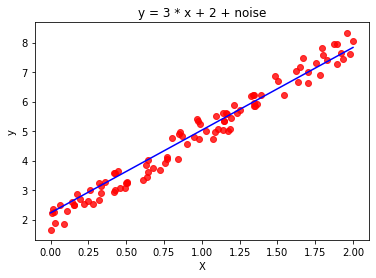

In [6]:
x = np.linspace(0,2,100)
hat_y = 2.8044658*x+2.2277365
plt.scatter(X, y, alpha=0.8, c='red')
plt.plot(x, hat_y, '-b', label='y = 2.8044658 * x + 2.2277365')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3 * x + 2 + noise')
plt.show()
plt.close()

## Multiple Linear Legression

Multiple Linear Legression 和 Linear Regression with One Variable 的差别在于多了几个变量，同时多了几个参数，计算参数的方法完全一致。这里使用 Boston Housing Dataset 作为例子进行演示。这个数据集是在 Machine Learning 学习过程中会经常遇到的一个数据集，该数据集通过 13 个 Feature 对最终的房价进行预测，该数据集里没有缺失和异常值，对 Feature 的处理很少，用于学习概念很合适。

需要注意的是，在多元变量下，使用矩阵的计算能加速参数的计算，代码结构上也更加的简介明了。相应的，需要把上面提到的部分公式进行改写，以符合矩阵的形式。

$\begin{align*}
Loss & = \frac{1}{2} \sum\limits_{i}^{N} (\mathbf{\theta}^T \cdot \mathbf{x_i} + b - y_i)^2 \\
\mathbf{\theta} & = \mathbf{\theta} - \eta \cdot \frac{1}{n} \sum\limits_{i}^{n}(\mathbf{\theta}^T \cdot \mathbf{x_i} + b - y_i) * \mathbf{x_i} \\
b & = b - \eta \cdot \frac{1}{n} \sum\limits_{i}^{n}(\mathbf{\theta}^T \cdot \mathbf{x_i} + b - y_i)
\end{align*}$

In [7]:
# numpy

import numpy as np
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

theta = np.random.randn(X.shape[1], 1)
b = 0.1
LEARNING_RATE = 1e-5

BATCH_SIZE = 16
EPOCH = 13000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = X[index].reshape(X.shape[1], BATCH_SIZE)
    sample_y = y[index]

    y_pred = np.dot(theta.T, sample_x) + b
    loss = y_pred - sample_y

    o = (np.sum(loss * sample_x, 1)).reshape(X.shape[1], 1)
    theta -= LEARNING_RATE * o / BATCH_SIZE
    b -= LEARNING_RATE * np.sum(loss) / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, (loss * loss).sum()))

print(theta, b, (loss * loss).sum())

EPOCH: 0, loss: 12061377.043809
EPOCH: 650, loss: 2800.148043
EPOCH: 1300, loss: 3081.186250
EPOCH: 1950, loss: 2399.239125
EPOCH: 2600, loss: 3220.509369
EPOCH: 3250, loss: 1863.064083
EPOCH: 3900, loss: 1369.353675
EPOCH: 4550, loss: 2394.740868
EPOCH: 5200, loss: 2787.422351
EPOCH: 5850, loss: 1630.358466
EPOCH: 6500, loss: 1094.397869
EPOCH: 7150, loss: 637.673637
EPOCH: 7800, loss: 2397.873694
EPOCH: 8450, loss: 2796.362066
EPOCH: 9100, loss: 1497.013945
EPOCH: 9750, loss: 2708.027622
EPOCH: 10400, loss: 2431.132794
EPOCH: 11050, loss: 1885.413045
EPOCH: 11700, loss: 2173.982852
EPOCH: 12350, loss: 3125.917318
[[0.01666089]
 [0.03957182]
 [0.01610923]
 [0.02731915]
 [0.00756314]
 [0.02136423]
 [0.0179621 ]
 [0.03227554]
 [0.01831947]
 [0.02939445]
 [0.02212424]
 [0.0189968 ]
 [0.02077507]] 0.22604020976964553 1380.8095079476943


In [9]:
# PyTorch

import numpy as np
import torch

device = torch.device('cpu')
dtype = torch.double

X, y = load_boston(return_X_y=True)
INPUT_DIMENSION, OUTPUT_DIMENSION = X.shape[1], 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype, requires_grad=True)
b = torch.randn(1, 1, device=device, dtype=dtype, requires_grad=True)
LEARNING_RATE = 1e-8

BATCH_SIZE = 16
EPOCH = 10000
PRINT_STEP = EPOCH / 5

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = theta.T.mm(sample_x) + b
    loss = y_pred - sample_y

    loss.pow(2).sum().backward()

    with torch.no_grad():
        theta -= LEARNING_RATE * theta.grad
        b -= LEARNING_RATE * b.grad

        # Manually zero the gradients after updating weights
        theta.grad.zero_()
        b.grad.zero_()

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, loss.pow(2).sum()))

print(theta, b)

EPOCH: 0, loss: 5530627.094221
EPOCH: 2000, loss: 2326.043113
EPOCH: 4000, loss: 1775.924608
EPOCH: 6000, loss: 1468.102025
EPOCH: 8000, loss: 1535.057879
tensor([[0.0249],
        [0.0258],
        [0.0256],
        [0.0253],
        [0.0244],
        [0.0255],
        [0.0265],
        [0.0233],
        [0.0275],
        [0.0262],
        [0.0269],
        [0.0247],
        [0.0267]], dtype=torch.float64, requires_grad=True) tensor([[-1.5850]], dtype=torch.float64, requires_grad=True)


使用 PyTorch 比手写的计算要稳定很多，但是手写版本的代码可以加深对算法的理解。

在统计学中，使用平方损失而不是其他损失是有前提假设条件的，如果满足这些条件，那么使用平方损失得到的线性模型是 BLUE 的，也就是模型是最优的，这也被称之为 Gauss-Markov 定理：

* 模型为线性关系
* 得到的数据样本是从所有可能的数据中随机抽取的
* 在样本中，没有独立变量是常数，并且独立变量之间不存在完全共线性
* 能生成所有数据的方程的误差项的均值为 0
* 误差项的方差为一个常数

在实际中，上面的这些假设条件都很难验证，即使最基本的 Feature 和 Label 之间是存在线性关系这件事都很难验证。同时在大于 3 维的情况下，基本上不可能实现一个正确的数据可视化，所以在实际中采用的做法往往是使用线性模型去拟合数据，然后再看结果是否是我们想要的，如果结果能为我们所用，那么就采用这个模型，如果这个模型的结果不能用，就要尝试做一些变量的筛选、变换，构造一个新的模型。也许这个数据根本就不能用线性模型合理的表达，可很多时候往往还是采用了线性模型的方案，因为它简单，能快速的尝试。